In [ ]:
# STEP 4: TEST DATA QUALITY for corrected data
# Explore Result Quality Part IV.
# This notebook visualizes the statistics obtained in a prior step (Result Quality Part I.). 

In [1]:
# >>> Preparation
# Import statistics
import pandas

print("Importing name statistics... ")
names_stats = pandas.read_csv("../../_data/names_score_min_stats_i1.csv")

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
#names_stats = names_stats.set_index("min_score", drop = False)
print("Stats imported. They look like this: {}".format(names_stats[:3]))

Importing name statistics... 
Stats imported. They look like this:    Unnamed: 0  score_min  pubs_mean  pubs_mean_f  pubs_mean_m  pubs_mean_dif  \
0           0          0   5.789820     4.386565     6.116970       0.000000   
1           1          1   5.792493     4.206489     6.138843      -0.058228   
2           2          2   5.879652     4.068624     6.264202      -0.086099   

   pubs_mean_f_dif  pubs_mean_m_dif  pubs_median  pubs_median_f  \
0         0.206770         0.002535          2.0            1.0   
1         0.135340        -0.028806          2.0            1.0   
2         0.008869        -0.014759          2.0            1.0   

          ...          pubs_m_dif  pubs_f_part  pubs_f_part_dif  \
0         ...             -295202     0.143238         0.022106   
1         ...             -158731     0.130162         0.024972   
2         ...             -157571     0.121199         0.025155   

   authors_total  authors_f  authors_m  authors_f_dif  authors_m_dif  \
0 

In [2]:
# For our population of 2306418 names we need at least a sample of 16.522 names to analyze for
# a confidence level of 99%  with error tolerance of 4%
# (According to Surveymonkey: https://www.surveymonkey.de/mp/sample-size-calculator/)
# So we can only chose thresholds that guarantee this minimum amount of names.

names_stats_valid = names_stats[names_stats['authors_total'] >= 16522]

In [3]:
min_threshold = names_stats_valid['score_min'].min()
max_threshold = names_stats_valid['score_min'].max()

In [4]:
print("The minimum valid threshold is {}, the maximum is {}".format(min_threshold, max_threshold))

The minimum valid threshold is 0, the maximum is 15


In [5]:
# >>> Visualization
import matplotlib.pyplot as plt

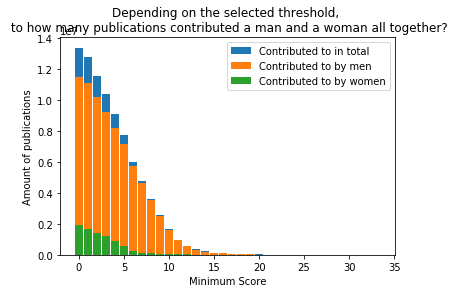

In [6]:
# Visualize how many publications have been contributed to: in total, by men, by women
plt.bar(names_stats['score_min'], names_stats['pubs_total'], label="Contributed to in total")
plt.bar(names_stats['score_min'], names_stats['pubs_m'], label="Contributed to by men")
plt.bar(names_stats['score_min'], names_stats['pubs_f'], label="Contributed to by women")

plt.xlabel("Minimum Score")
plt.ylabel("Amount of publications")
plt.title("Depending on the selected threshold, \n to how many publications contributed a man and a woman all together?")
plt.legend()

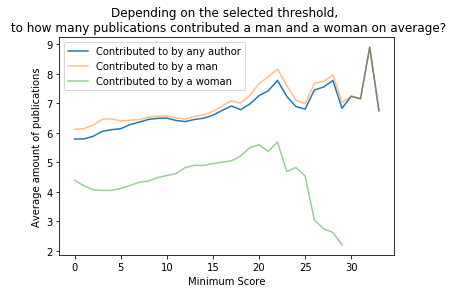

In [7]:
# Amount of contributions: Mean

plt.plot(names_stats['score_min'], names_stats['pubs_mean'], label="Contributed to by any author")
plt.plot(names_stats['score_min'], names_stats['pubs_mean_m'], alpha=0.5, label="Contributed to by a man")
plt.plot(names_stats['score_min'], names_stats['pubs_mean_f'], alpha=0.5, label="Contributed to by a woman")

plt.xlabel("Minimum Score")
plt.ylabel("Average amount of publications")
plt.title("Depending on the selected threshold, \n to how many publications contributed a man and a woman on average?")
plt.legend()

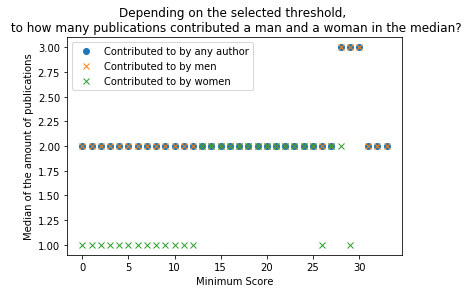

In [8]:
# Amount of contributions: Median

plt.plot(names_stats['score_min'], names_stats['pubs_median'], "o", label="Contributed to by any author")
plt.plot(names_stats['score_min'], names_stats['pubs_median_m'], "x", label="Contributed to by men")
plt.plot(names_stats['score_min'], names_stats['pubs_median_f'], "x", label="Contributed to by women")

plt.xlabel("Minimum Score")
plt.ylabel("Median of the amount of publications")
plt.title("Depending on the selected threshold, \n to how many publications contributed a man and a woman in the median?")
plt.legend()

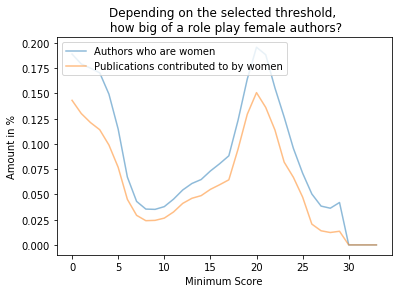

In [9]:
# Amount of contributions / Authors: Percentage of women

plt.plot(names_stats['score_min'], names_stats['authors_f_part'], alpha=0.5, label="Authors who are women")
plt.plot(names_stats['score_min'], names_stats['pubs_f_part'], alpha=0.5, label="Publications contributed to by women")

plt.xlabel("Minimum Score")
plt.ylabel("Amount in %")
plt.title("Depending on the selected threshold, \n how big of a role play female authors?")
plt.legend(loc="upper left")

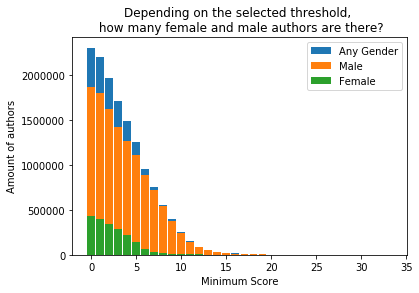

In [12]:
# Amount of authors: Total
plt.bar(names_stats['score_min'], names_stats['authors_total'], label="Any Gender")
plt.bar(names_stats['score_min'], names_stats['authors_m'], label="Male")
plt.bar(names_stats['score_min'], names_stats['authors_f'], label="Female")

plt.xlabel("Minimum Score")
plt.ylabel("Amount of authors")
plt.title("Depending on the selected threshold, \n how many female and male authors are there?")
plt.legend()

In [13]:
# >>> Interpretation:
# Depending on the chosen threshold of data to exclude from the analysis, our results change. 
# The results from the corrected data are only slightly different than the results from the uncorrected data.

# Considering our calculated minimum valid threshold and maximum valid threshold,
# let's assume the score minimum needs to be at least 0 and at most 15
# The lowest measured amount of female authors is 3,5%,
# The highest measured amount of female authors is 16,8%.
# So the amount of female authors lays between 3,5% and 18,9% (before it was about 16%)